# Pizza Hut Warehouse(Cold-Storage) Recommendation
In this project I have worked on weighted k_means clustering to allocate warehouse or cold-storage location for various pizza-hut outlets accross california(USA) 

In [1]:
#importing varous libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#below dataset is scraped from pizza hut website please refer to scraping notebook for more info
pizza_hut_locations = pd.read_csv('Pizza_Hut_dataset.csv')
pizza_hut_locations.head()


,City_Name,Outlet_Count
0,Alameda,1
1,Alhambra,2
2,Alpine,1
3,Altadena,1
4,Anaheim,10


In [2]:
pizza_hut_locations.isnull().any() #checking for null value if any
print(pizza_hut_locations.dtypes)

City_Name       object
Outlet_Count     int64
dtype: object


In [3]:
pizza_hut_locations.describe() #describing the dataset

,Outlet_Count
count,263.000000
mean,2.228137
std,2.939798
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,33.000000


## Prepocessing Population Data

In [4]:
california_population= pd.read_csv('california_population.csv')
california_population.head()

,Rank,City_Name,2020_Population,2010_Population,Change,Density
0,1,Los Angeles,"4,015,940","3,795,370",5.81%,"3,306"
1,2,San Diego,"1,447,100","1,305,970",10.81%,"1,715"
2,3,San Jose,"1,033,670","954,492",8.30%,"2,245"
3,4,San Francisco,"896,047","805,550",11.23%,"7,376"
4,5,Fresno,"538,195","497,721",8.13%,"1,811"


In [5]:
california_population.dtypes
#california_population['2020 pop'] = california_population['2020 pop'].str.replace(',', '').astype(int)
print(california_population.isnull().any()) #identifying null values

california_population.fillna(0,inplace=True) #filling null values
california_population.isnull().any()

Rank               False
City_Name          False
2020_Population    False
2010_Population     True
Change              True
Density            False
dtype: bool


Rank               False
City_Name          False
2020_Population    False
2010_Population    False
Change             False
Density            False
dtype: bool

In [6]:
print(california_population.dtypes)
#dropping off all the columns that are not neccessary
california_population=california_population.drop(['Rank','2010_Population','Change','Density'],axis=1)
#converting population object datatype to integer data type
california_population['2020_Population'] = california_population['2020_Population'].str.replace(',', '').astype(int)
print(california_population.dtypes)
california_population.head()

Rank                int64
City_Name          object
2020_Population    object
2010_Population    object
Change             object
Density            object
dtype: object
City_Name          object
2020_Population     int32
dtype: object


,City_Name,2020_Population
0,Los Angeles,4015940
1,San Diego,1447100
2,San Jose,1033670
3,San Francisco,896047
4,Fresno,538195


In [7]:
california_population['City_Name'] = california_population['City_Name'].astype(str)
california_population.describe()
print(california_population.dtypes)

City_Name          object
2020_Population     int32
dtype: object


In [8]:
#Merging both the tables by inner join
Pizza_Hut_Count=pd.merge(california_population,pizza_hut_locations,on='City_Name',how='inner')
Pizza_Hut_Count.head()

,City_Name,2020_Population,Outlet_Count
0,Los Angeles,4015940,33
1,San Diego,1447100,18
2,San Jose,1033670,15
3,Fresno,538195,10
4,Sacramento,521769,10


In [9]:
#adding california at the end of every city name because there are many cities in different countries with same name 
#so when applying geocoder to get coordinates we might end up getting coordinates of foreign counterpart to avoid this we add california at the end
#for example san jose is also present in brazil as well as in california
Pizza_Hut_Count['City_Name']=Pizza_Hut_Count['City_Name']+", California"
Pizza_Hut_Count.head()

,City_Name,2020_Population,Outlet_Count
0,"Los Angeles, California",4015940,33
1,"San Diego, California",1447100,18
2,"San Jose, California",1033670,15
3,"Fresno, California",538195,10
4,"Sacramento, California",521769,10


### Data Visualization

In [10]:
Pizza_Hut_Count=Pizza_Hut_Count.sort_values(by=['2020_Population'],ascending=False)
Pizza_Hut_Count.head()

,City_Name,2020_Population,Outlet_Count
0,"Los Angeles, California",4015940,33
1,"San Diego, California",1447100,18
2,"San Jose, California",1033670,15
3,"Fresno, California",538195,10
4,"Sacramento, California",521769,10


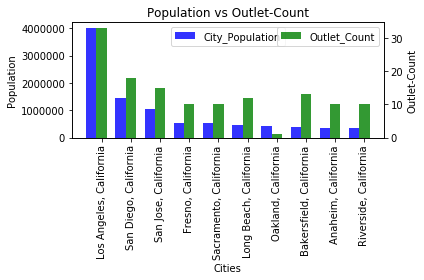

In [11]:
#from sklearn import preprocessing

n_groups = 10
City_Population = Pizza_Hut_Count["2020_Population"][0:10]
Outlet_Count =Pizza_Hut_Count["Outlet_Count"][0:10]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

tick=Pizza_Hut_Count["City_Name"][0:10]

#Plotting left hand side y-axis plot
ax1 = plt.plot()
plt.bar(index, City_Population, bar_width,
alpha=opacity,
color='b',
label='City_Population')
plt.xlabel('Cities')
plt.ylabel('Population')
plt.legend()
plt.xticks(index + bar_width,tick,rotation='vertical')
plt.legend(loc = 'upper center')

#Plotting right hand side y-axis plot
ax2 = ax.twinx() #to use both the y axis one for population and one for outlet_count
plt.bar(index + bar_width, Outlet_Count, bar_width,
alpha=opacity,
color='g',
label='Outlet_Count')


plt.ylabel('Outlet-Count')
plt.title('Population vs Outlet-Count')
plt.xticks(index + bar_width,tick,rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

## Using Geocoder To Map Location To Latitute and Longitude
As we only have the names of locations of the places where there is a pizza-hut outlet but we need to convert name into geo-coordinates(i.e longitude and latitude) to calculate distance metric


In [12]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MY_PROJ")
#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

Pizza_Hut_Count['Latitude']=Pizza_Hut_Count['City_Name'].apply(lambda x:geolocator.geocode(x,timeout=1000).latitude)
Pizza_Hut_Count['Longitude']=Pizza_Hut_Count['City_Name'].apply(lambda x:geolocator.geocode(x,timeout=1000).longitude)


In [13]:
Pizza_Hut_Count.head()

,City_Name,2020_Population,Outlet_Count,Latitude,Longitude
0,"Los Angeles, California",4015940,33,34.053691,-118.242766
1,"San Diego, California",1447100,18,32.717420,-117.162773
2,"San Jose, California",1033670,15,37.336191,-121.890583
3,"Fresno, California",538195,10,36.739442,-119.784831
4,"Sacramento, California",521769,10,38.581061,-121.493895


In [14]:
geolocator.geocode('Los Angeles') #what geocode outputs

Location(Los Angeles, Los Angeles County, California, United States, (34.0536909, -118.242766, 0.0))

## Applying weighted K-means Clustering
To work with weighted k-means we need to combine both feature 2020_population and outlet_count then we will apply k-means with weighted mean of this weights with Latitude and Longitude. Also maximum of us believe that earth is round thus we need to use haversine distance in the place of euclidean distance for more accurate results and to do so we need to write k-means from scratch because ***k-means clustering does not support haversine distance directly***

In [15]:
# combining 2020_population and Outlet_count by simply multiplying both the columns
Pizza_Hut_Count["weights"]=Pizza_Hut_Count["2020_Population"]*Pizza_Hut_Count["Outlet_Count"]
Pizza_Hut_Count.head()
#Pizza_Hut_Count[Pizza_Hut_count.weights<0]

,City_Name,2020_Population,Outlet_Count,Latitude,Longitude,weights
0,"Los Angeles, California",4015940,33,34.053691,-118.242766,132526020
1,"San Diego, California",1447100,18,32.717420,-117.162773,26047800
2,"San Jose, California",1033670,15,37.336191,-121.890583,15505050
3,"Fresno, California",538195,10,36.739442,-119.784831,5381950
4,"Sacramento, California",521769,10,38.581061,-121.493895,5217690


In [16]:
#Pizza_Hut_Count[Pizza_Hut_Count.weights==0]

,City_Name,2020_Population,Outlet_Count,Latitude,Longitude,weights


In [17]:
#Dropping 2020_Population and Outlet_Count column
Pizza_Hut_Count=Pizza_Hut_Count.drop(["2020_Population","Outlet_Count"],axis=1)


In [18]:
Pizza_Hut_Count[['Longitude','Latitude']].values

array([[-118.242766  ,   34.0536909 ],
       [-117.1627728 ,   32.7174202 ],
       [-121.890583  ,   37.3361905 ],
       [-119.7848307 ,   36.7394421 ],
       [-121.4938951 ,   38.5810606 ],
       [-118.191604  ,   33.7690164 ],
       [-122.2713563 ,   37.8044557 ],
       [-119.0194639 ,   35.3738712 ],
       [-117.911732  ,   33.8347516 ],
       [-117.3961623 ,   33.9533546 ],
       [-117.8732213 ,   33.7494951 ],
       [-121.2907796 ,   37.9577016 ],
       [-117.8259819 ,   33.6856969 ],
       [-117.0841955 ,   32.6400541 ],
       [-121.9885719 ,   37.5482697 ],
       [-120.9968782 ,   37.6390972 ],
       [-117.435048  ,   34.0922335 ],
       [-116.0833144 ,   34.8253019 ],
       [-117.2305944 ,   33.937517  ],
       [-119.1803818 ,   34.1976308 ],
       [-118.542586  ,   34.3916641 ],
       [-118.2478471 ,   34.1469416 ],
       [-118.0000166 ,   33.6783336 ],
       [-117.6484304 ,   34.065846  ],
       [-117.5751735 ,   34.1033192 ],
       [-121.3716178 ,   

In [19]:
Pizza_Hut_Count.head()

,City_Name,Latitude,Longitude,weights
0,"Los Angeles, California",34.053691,-118.242766,132526020
1,"San Diego, California",32.717420,-117.162773,26047800
2,"San Jose, California",37.336191,-121.890583,15505050
3,"Fresno, California",36.739442,-119.784831,5381950
4,"Sacramento, California",38.581061,-121.493895,5217690


Haversine Distance Formula is best suited method for calculating distance when we want to deal with location distances 

#### Haversine Distance Formula
##### a = sin²(( φB — φA) /2) + cos φA * cos φB * sin²((λB — λA) /2)
##### c = 2 * atan2( √a, √(1−a) )
##### d = R ⋅ c    (where R is radius of earth)

Below is the scratch implementation of weighted k-means with haversine distance 

In [20]:
#k_means
from math import *
class K_Means:
    def __init__(self, k, inc=0.001, max_iter=300):
        self.k = k
        self.inc = inc
        self.max_iter = max_iter
       # self.weights=weight
    def Hav_Dis(self,p1,p2):
        
        lon1=p1[0] 
        lat1=p1[1]
        lon2=p2[0]
        lat2=p2[1]
        R=6371000 #earth radius in meters
        dLat = radians(lat2 - lat1)
        dLon = radians(lon2 - lon1)
        lat1 = radians(lat1)
        lat2 = radians(lat2)
        a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
        c = 2 * asin(sqrt(a))
        return R * c
    def fit(self,data,weight):
        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            self.weights={}            
            for i in range(self.k):
                self.classifications[i] = []
                self.weights[i]=[]
            for index,featureset in enumerate(data):
                distances = [self.Hav_Dis(featureset,self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                self.weights[classification].append(weight[index])
                prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0,weights=self.weights[classification])

                optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.inc:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        classifications=[]
        for featureset in data:
            distances = [self.Hav_Dis(featureset,self.centroids[centroid]) for centroid in self.centroids]
            classification=distances.index(min(distances))
            classifications.append(classification)
        return classifications

## Analyzing and plotting the Model
Analyzing and plotting is one of the most important task of Machine Learning. Thus, There is need to choose right error metric and right plotting graph to understand, improve and convey the insights obtained from the data

In [21]:
'''X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])
for i,j in enumerate(X):
    print(i,j)'''
X=np.array(Pizza_Hut_Count[['Longitude','Latitude']])#initializing input data array
weight=np.array(Pizza_Hut_Count['weights'])          #initializing weights array for weighted mean


In [22]:
#Defining a function to calculate silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

def clustering_errors(k, data, weight):
    kmeans = K_Means(k)
    kmeans.fit(data, weight)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data,np.array(predictions).T)
    return silhouette_avg

In [23]:
possible_k_values = range(2, 60, 5) #generating list of all possible k-values from range 2 to 60 with 
                                          #gap of 5
    
errors_per_k = [clustering_errors(k, X,weight) for k in possible_k_values] #calculating silhouette score for above list


2.25316303352
0.182316683592
0.212947382549
1.03027609695
0.277464412686
0.831060698239
0.0894841135788
0.221768888796
7.79604682404
1.79554567877
1.95896477406
0.180202513732
0.0653026730898
0.0115160719354
0.171979613178
0.129769408416
0.252376108163
0.138172790181
0.0201724523369
0.0342261863204
0.0672923724011
0.211360237497
0.0601825878864
0.259261844492
0.130726098925
0.187658975922
0.17369458788
0.0209483269279
0.00795405744312
0.0790743414062
0.0250242063045
0.0143177768218
0.00495408616471
0.00110981039961
0.0154315571581
0.155447548382
0.115417658238
0.00223383634231
0.0254077902217
0.025960105554
0.00868685993532
0.00629318595186
0.0342261863204
0.0908776672226
0.211360237497
0.0601825878864
0.651215403783
0.130726098925
0.182902383095
0.188372114329
0.378737680129
0.00764471795393
0.163041866938
0.0631925879265
0.185056856136
0.125526014838
0.0588507368841
0.44255845262
0.0149179388513
0.233989771369
0.059936904671
0.104596085548
0.127913343278
0.00110981039961
0.0151407773

In [24]:
list(zip(possible_k_values, errors_per_k)) 

[(2, 0.75463474187078405),
 (7, 0.32176710938006309),
 (12, 0.25099471492185843),
 (17, 0.25916679124189501),
 (22, 0.28039776718714987),
 (27, 0.28161760692195048),
 (32, 0.28414501702827394),
 (37, 0.27504422499579234),
 (42, 0.29155701788093508),
 (47, 0.28794451853544389),
 (52, 0.23958428392817419),
 (57, 0.3141360822707272)]

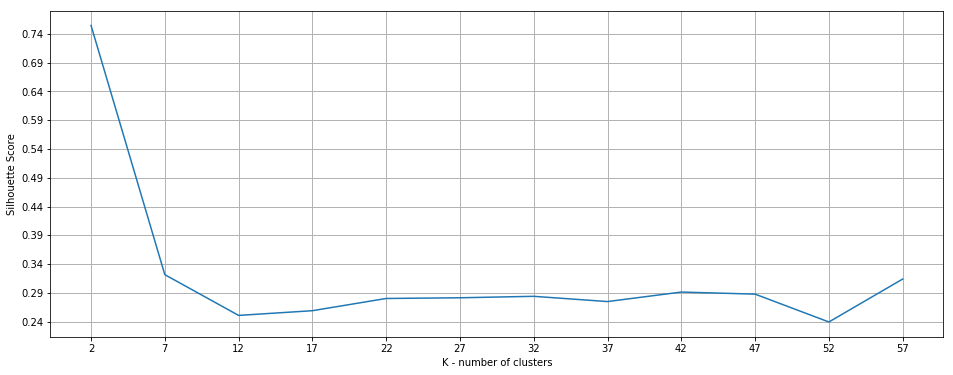

In [25]:
#Plotting the silhouette score vs k value graph
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

In [26]:
#selecting value of k as 4 and training model on it
X=np.array(Pizza_Hut_Count[['Longitude','Latitude']])
weight=np.array(Pizza_Hut_Count['weights'])
model = K_Means(4)
model.fit(X,weight)



0.00185110295485
0.182316683592
0.97487230842
0.0171321141876
0.0114773621795


In [27]:
predictions=model.predict(X)
predictions
silhouette_avg = silhouette_score(X, np.array(predictions).T)
silhouette_avg

0.53866378350387578

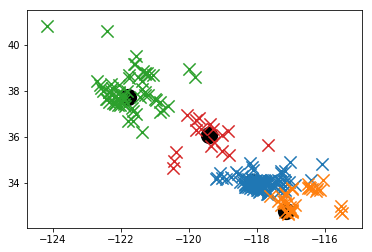

In [28]:
#Plotting our centroids and data belonging to that centroid
from matplotlib.colors import *
from matplotlib import style
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
i=0
for classification in model.classifications:
    color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for featureset in model.classifications[classification]:
       plt.scatter(featureset[0], featureset[1],color= color[i], marker="x",cmap='viridis', s=150, linewidths=5)
    i+=1 
plt.show()

### The above Plotting does not provide great intuition of warehouse and outlets so lets switch to maps

In [29]:
#X=np.array(Pizza_Hut_Count[['Longitude','Latitude']])


## Visualizing Data On Map
Below is the map of california(USA) where we can see outlets as colored dots and clusters as cross. similar colored dots(outlet) belongs to one cluster(warehouse) and as I have selected k to be 4 there will be 4 clusters(warehouse) each containing different colored dots(outlets)

In [30]:
import os
os.environ["PROJ_LIB"] = "F:\ANACONDA\envs\ct\Library\share" #Path to epsg file in environment named ct this file is 
from mpl_toolkits.basemap import Basemap                     #required for proper functioning of basemap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

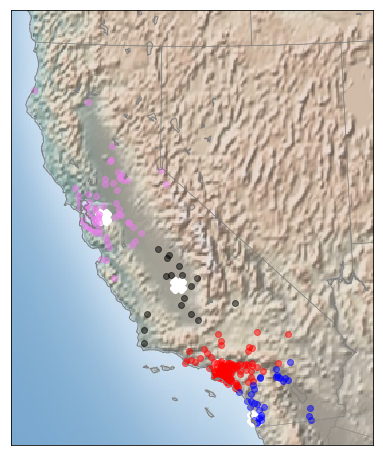

In [31]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray') 

#Plotting centroid of the clusters
for centroid in model.centroids:
    m.scatter(model.centroids[centroid][0], model.centroids[centroid][1],latlon=True,
                marker="X", color="white", s=150, linewidths=5)

#Plotting cities alloted to a particular cluster
j=0
colors=['red','blue','violet','black','purple','green','orange','pink','white','grey']
for classification in model.classifications:
        #print(classification)
        #color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
       
        for i in model.classifications[classification]:
            #print(i)
            lon=i[0]
            lat=i[1]
            m.scatter(lon, lat, latlon=True,c=colors[j], alpha=0.5)
        j+=1




In [32]:
#Pizza_Hut_Count.query('Longitude==-76.2411283 ')

,City_Name,Latitude,Longitude,weights


In [33]:

#geolocator.geocode('Los Angeles,California')

Location(Los Angeles, Los Angeles County, California, United States, (34.0536909, -118.242766, 0.0))